In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import expm

we are pertubing a hamiltonian and comparing the entries of density matrices wriiten for in perturbed bases

## Making Unperturbed matrix H

## time evolution

set initial state

In [2]:
state0 = np.random.uniform(-1, 1, size=(3,)) + 1j*np.random.normal(-1, 1, size=(3,))
#state0 = np.array([1,0,1])
state0 = state0/np.linalg.norm(state0)

Unperturbed hamiltonian

In [3]:
s = 1
d = .5

H = np.array([[s-2*d/3,0,0],
              [0,s-2*d/3+d,0],
              [0,0,s-2*d/3+d]])

In [4]:
eig, U = np.linalg.eig(H)

In [5]:
X = np.outer(np.conj(state0),state0)

In [6]:
def calculate_pert_evol(X):
    # set parameters
    # sd : standard deviation, t : time passed, h : value of hbar, l : modulates size of perturbation
    sd = 1
    t = 1e200
    h = 1
    l = .00001

    # create Hd, the perturbed Hamiltonian
    A = np.random.normal(size=(3,3), scale=sd)
    B = np.random.normal(size=(3,3), scale=sd)
    C = A + 1j*B
    d = (C + np.conj(C.T))/2
    Hd = H + l*d

    # Change of basis into Hd eigenbasis
    eigd, Ud = np.linalg.eig(Hd)
    eigd = np.real(eigd)
    V = np.linalg.inv(Ud) @ U
    Vt = np.linalg.inv(V)
    Xd = Vt @ X @ V

    # Time evolution
    Hddiag = np.diag(eigd)
    evol = expm(-1j/h * Hddiag * t)
    F = np.linalg.inv(evol)@Xd@evol

    # Check how much error there is
    if np.linalg.norm(F - np.matrix(F).H) > .001:
        print('not hermitian')

    # Change of basis back to H eigenbasis
    F = V @ F @ Vt

    # formatting
    f = [F.flatten()]
    return f

In [7]:
P = np.array([X.flatten()])
for i in range(10000):
    pert = calculate_pert_evol(X)
    P = np.concatenate((P,pert))

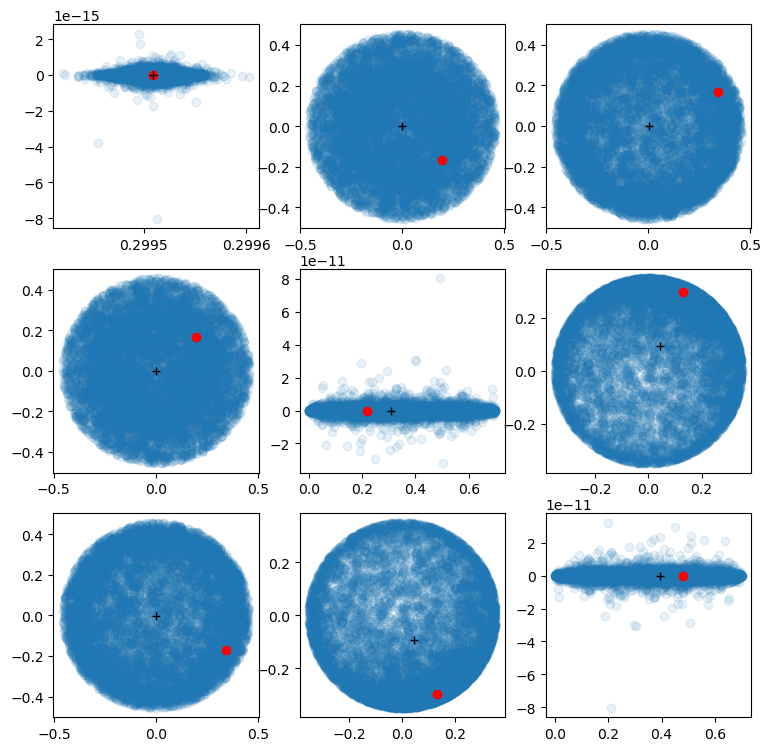

In [8]:
datak = P[1:,:]
x=[]
y=[]
for k in range(9):
    real = [z.real for z in datak[:,k]]
    imag = [z.imag for z in datak[:,k]]
    x.append(real)
    y.append(imag)

Xf = X.flatten()

re = [z.real for z in Xf]
im = [z.imag for z in Xf]

samp_meank = np.mean(datak, axis=0)

figure, axis = plt.subplots(3,3, figsize=(9,9))

axis[0,0].scatter(x[0],y[0], alpha=.1)
axis[0,0].plot(re[0],im[0], 'ro')


axis[0,1].scatter(x[1],y[1], alpha=.1)
axis[0,1].plot(re[1],im[1], 'ro')

axis[0,2].scatter(x[2],y[2], alpha=.1)
axis[0,2].plot(re[2],im[2], 'ro')

axis[1,0].scatter(x[3],y[3], alpha=.1)
axis[1,0].plot(re[3],im[3], 'ro')

axis[1,1].scatter(x[4],y[4], alpha=.1)
axis[1,1].plot(re[4],im[4], 'ro')

axis[1,2].scatter(x[5],y[5], alpha=.1)
axis[1,2].plot(re[5],im[5], 'ro')

axis[2,0].scatter(x[6],y[6], alpha=.1)
axis[2,0].plot(re[6],im[6], 'ro')

axis[2,1].scatter(x[7],y[7], alpha=.1)
axis[2,1].plot(re[7],im[7], 'ro')

axis[2,2].scatter(x[8],y[8], alpha=.1)
axis[2,2].plot(re[8],im[8], 'ro')


re = [z.real for z in samp_meank]
im = [z.imag for z in samp_meank]
axis[0,0].plot(re[0],im[0], 'k+')
axis[0,1].plot(re[1],im[1], 'k+')
axis[0,2].plot(re[2],im[2], 'k+')
axis[1,0].plot(re[3],im[3], 'k+')
axis[1,1].plot(re[4],im[4], 'k+')
axis[1,2].plot(re[5],im[5], 'k+')
axis[2,0].plot(re[6],im[6], 'k+')
axis[2,1].plot(re[7],im[7], 'k+')
axis[2,2].plot(re[8],im[8], 'k+')


In [9]:
samp_meank

array([ 2.99509130e-01-8.15655748e-18j, -1.81574200e-04+1.09772497e-03j,
        8.40353978e-04+1.90154839e-03j, -1.81574200e-04-1.09772497e-03j,
        3.06450616e-01+2.99974035e-14j,  4.39085459e-02+9.36905328e-02j,
        8.40353978e-04-1.90154839e-03j,  4.39085459e-02-9.36905328e-02j,
        3.94040254e-01-2.99958639e-14j])

In [10]:
np.mean(datak[:,0])

(0.29950913006545116-8.156557476559989e-18j)

In [11]:
samp_mean = np.mean(datak, axis=0)
prob_error = np.array([samp_mean[0],samp_mean[4], samp_mean[8]]) - np.array([Xf[0],Xf[4],Xf[8]])

### diagonal error

tells us how far away from born rule probabilities the on diagonal sample means are

In [12]:
np.max(np.abs(prob_error))

0.08771660888160576

### off-diagonal error

tells us how far away from 0 the off diagonal sample means are

In [13]:
np.max(np.abs(np.array([samp_mean[1], samp_mean[2], samp_mean[3], samp_mean[5], samp_mean[6], samp_mean[7]])))

0.1034692047904069

In [14]:
[samp_mean[0],samp_mean[4], samp_mean[8]]

[(0.29950913006545127-8.156557476559915e-18j),
 (0.3064506163489324+2.999740354299328e-14j),
 (0.3940402535856155-2.9995863900034875e-14j)]

# to do

- give more control over distribution
- reduce parameters
- make each instance reproduceable
- isolate parameters
- view throughout time
- develop a reasonable test for convergence
- test different distributions
- view pdf of each sample?

In [15]:
def make_pert(sd=1):
    A = np.random.normal(size=(3,3), scale=sd)
    B = np.random.normal(size=(3,3), scale=sd)
    C = A + 1j*B
    d = (C + np.conj(C.T))/2
    return d


def calculate_pert_traj(X, l, d):
    # set parameters
    # sd : standard deviation, t : time passed, h : value of hbar, l : modulates size of perturbation
    t = int(1e3)
    h = 1

    times = np.linspace(0,t, num=1000)

    # create Hd, the perturbed Hamiltonian

    Hd = H + l*d

    # Change of basis into Hd eigenbasis
    eigd, Ud = np.linalg.eig(Hd)
    eigd = np.real(eigd)
    V = np.linalg.inv(Ud) @ U
    Vt = np.linalg.inv(V)
    Xd = Vt @ X @ V

    # Time evolution

    P = np.array([X.flatten()])
    for time in times:
        Hddiag = np.diag(eigd)
        evol = expm(-1j/h * Hddiag * time)
        F = np.linalg.inv(evol)@Xd@evol

        # Check how much error there is
        if np.linalg.norm(F - np.matrix(F).H) > .001:
            print('not hermitian')

        # Change of basis back to H eigenbasis
        F = V @ F @ Vt

        # formatting
        f = [F.flatten()]
        P = np.concatenate((P,f))

    return P

In [16]:
d = make_pert()
P = calculate_pert_traj(X, 0, d)

In [17]:
P.shape

(1001, 9)

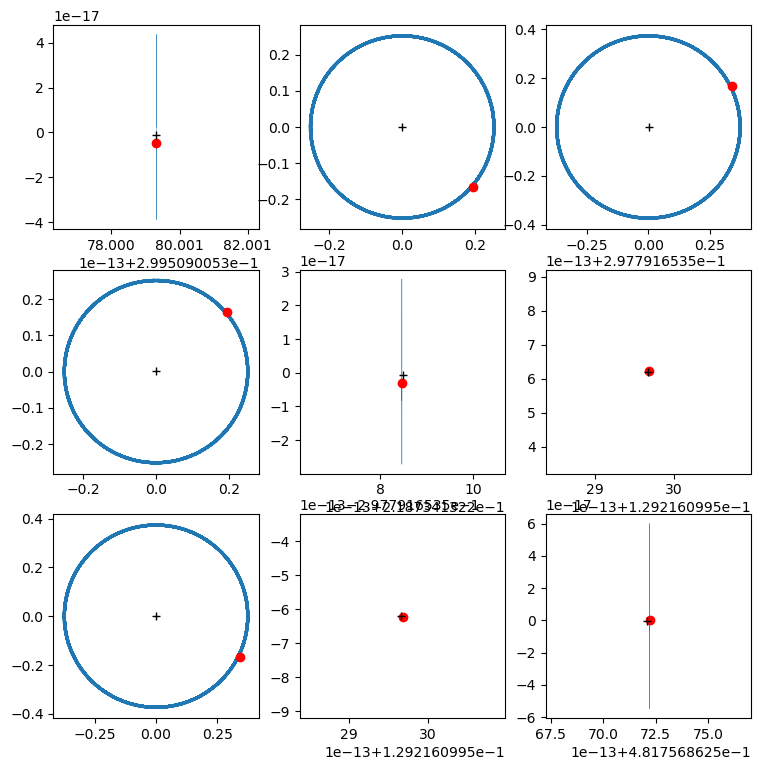

In [18]:
data = P
x=[]
y=[]
for k in range(9):
    real = [z.real for z in data[:,k]]
    imag = [z.imag for z in data[:,k]]
    x.append(real)
    y.append(imag)

Xf = X.flatten()

re = [z.real for z in Xf]
im = [z.imag for z in Xf]


samp_mean = np.mean(data, axis=0)

figure, axis = plt.subplots(3, 3, figsize=(9,9))


axis[0,0].plot(x[0],y[0], linewidth=.3, alpha=1)
axis[0,0].plot(re[0],im[0], 'ro')


axis[0,1].plot(x[1],y[1], linewidth=.3, alpha=1)
axis[0,1].plot(re[1],im[1], 'ro')

axis[0,2].plot(x[2],y[2], linewidth=.3, alpha=1)
axis[0,2].plot(re[2],im[2], 'ro')

axis[1,0].plot(x[3],y[3], linewidth=.3, alpha=1)
axis[1,0].plot(re[3],im[3], 'ro')

axis[1,1].plot(x[4],y[4], linewidth=.3, alpha=1)
axis[1,1].plot(re[4],im[4], 'ro')

axis[1,2].plot(x[5],y[5], linewidth=.3, alpha=1)
axis[1,2].plot(re[5],im[5], 'ro')

axis[2,0].plot(x[6],y[6], linewidth=.3, alpha=1)
axis[2,0].plot(re[6],im[6], 'ro')

axis[2,1].plot(x[7],y[7], linewidth=.3, alpha=1)
axis[2,1].plot(re[7],im[7], 'ro')

axis[2,2].plot(x[8],y[8], linewidth=.3, alpha=1)
axis[2,2].plot(re[8],im[8], 'ro')

re = [z.real for z in samp_mean]
im = [z.imag for z in samp_mean]
axis[0,0].plot(re[0],im[0], 'k+')
axis[0,1].plot(re[1],im[1], 'k+')
axis[0,2].plot(re[2],im[2], 'k+')
axis[1,0].plot(re[3],im[3], 'k+')
axis[1,1].plot(re[4],im[4], 'k+')
axis[1,2].plot(re[5],im[5], 'k+')
axis[2,0].plot(re[6],im[6], 'k+')
axis[2,1].plot(re[7],im[7], 'k+')
axis[2,2].plot(re[8],im[8], 'k+')

In [ ]:
lspace = np.linspace(0,1, num=3000)

d = make_pert()

for l in lspace:
    P = calculate_pert_traj(X, l, d)

    data = P
    x=[]
    y=[]
    for k in range(9):
        real = [z.real for z in data[:,k]]
        imag = [z.imag for z in data[:,k]]
        x.append(real)
        y.append(imag)

    Xf = X.flatten()

    re = [z.real for z in Xf]
    im = [z.imag for z in Xf]


    samp_mean = np.mean(data, axis=0)

    lw = .275

    figure, axis = plt.subplots(3, 3, figsize=(9,9))
    figure.suptitle(f'l={round(l, 4)}')

    axis[0,0].plot(x[0],y[0], linewidth=lw, alpha=1)
    axis[0,0].plot(re[0],im[0], 'ro')


    axis[0,1].plot(x[1],y[1], linewidth=lw, alpha=1)
    axis[0,1].plot(re[1],im[1], 'ro')

    axis[0,2].plot(x[2],y[2], linewidth=lw, alpha=1)
    axis[0,2].plot(re[2],im[2], 'ro')

    axis[1,0].plot(x[3],y[3], linewidth=lw, alpha=1)
    axis[1,0].plot(re[3],im[3], 'ro')

    axis[1,1].plot(x[4],y[4], linewidth=lw, alpha=1)
    axis[1,1].plot(re[4],im[4], 'ro')

    axis[1,2].plot(x[5],y[5], linewidth=lw, alpha=1)
    axis[1,2].plot(re[5],im[5], 'ro')

    axis[2,0].plot(x[6],y[6], linewidth=lw, alpha=1)
    axis[2,0].plot(re[6],im[6], 'ro')

    axis[2,1].plot(x[7],y[7], linewidth=lw, alpha=1)
    axis[2,1].plot(re[7],im[7], 'ro')

    axis[2,2].plot(x[8],y[8], linewidth=lw, alpha=1)
    axis[2,2].plot(re[8],im[8], 'ro')


    re = [z.real for z in samp_mean]
    im = [z.imag for z in samp_mean]
    axis[0,0].plot(re[0],im[0], 'k+')
    axis[0,1].plot(re[1],im[1], 'k+')
    axis[0,2].plot(re[2],im[2], 'k+')
    axis[1,0].plot(re[3],im[3], 'k+')
    axis[1,1].plot(re[4],im[4], 'k+')
    axis[1,2].plot(re[5],im[5], 'k+')
    axis[2,0].plot(re[6],im[6], 'k+')
    axis[2,1].plot(re[7],im[7], 'k+')
    axis[2,2].plot(re[8],im[8], 'k+')

    plt.savefig(f'modl/{l}.png')
    plt.close()
    
    